**Problem.** Znajdź największe koło wpisane w wielokąt o zadanych współrzędnych, np. (0.0, 1.2), (0.2, 1.8), (1.2, 3.5), (3.0, 2.0), (3.0, 0.0).

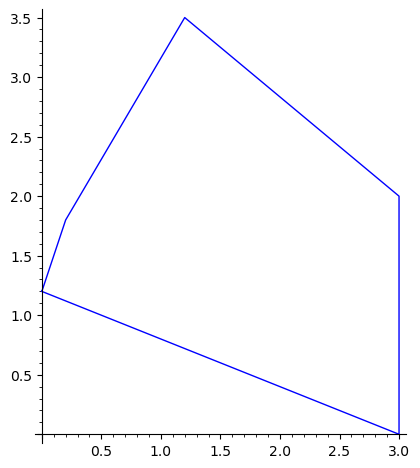

In [1]:
W = [ (0.0, 1.2), (0.2, 1.8), (1.2, 3.5), (3.0, 2.0), (3.0, 0.0) ]
list_plot(W + W[:1], plotjoined=True, aspect_ratio=1.0)

In [12]:
%display typeset

"""
Maksymalne koło wpisane w wielokąt wypukły.
"""

# Dane problemu

list_plot(W + W[:1], plotjoined=True, aspect_ratio=1.0)

# Konstrukcja problemu liniowego

p = InteractiveLPProblem(matrix(0, 3, []), vector([]), (0,0,1), ["x", "y", "r"], base_ring=RR) # ćwiczenie: sprawdź, co wychodzi nad domyślnym pierścieniem QQ

def add_halfplane_constraint(A, B, P):
    """
    Konstruujemy warunek ax + by >= c tak, by punkty A, B leżały na brzegu a punkt P w półpłaszczyźnie opisanej nierównością.
    """
    
    dx = A[0] - B[0]
    dy = A[1] - B[1]
    c = dy * A[0] - dx * A[1]

    if -dy * P[0] + dx * P[1] + c < 0:
        dx, dy, c = -dx, -dy, -c

    global p
    p = p.add_constraint(([-dy / sqrt(dy*dy+dx*dx), dx / sqrt(dy*dy+dx*dx), -1]), -c/sqrt(dy*dy+dx*dx), ">=")

for i in range(len(W)):
    add_halfplane_constraint(W[i-2], W[i-1], W[i])

show(p)

LP problem (use 'view(...)' or '%display typeset' for details)

Optymalna wartosc funkcji celu =  1.11492147900000
x= 1.495131457  y= 1.802754599  r= 1.114921479


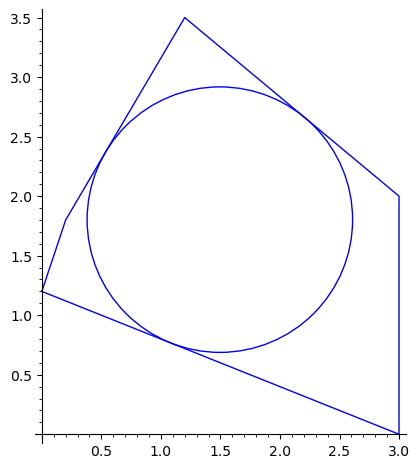

In [7]:
# Rozwiązanie problemu

x, y, r = p.optimal_solution()

print('Optymalna wartosc funkcji celu = ', p.optimal_value())
print('x=', x, ' y=', y, ' r=', r)

# Wizualizacja rozwiązania

circle((x, y), r) + list_plot(W + [W[0]], plotjoined=True)